<h1 style='color:gold; font-weight:bold'>Comparison of Different Clustering Methods on the Heart Dataset</h1>

<h2> This analysis compares the performance of various clustering algorithms on the heart.csv dataset, which contains cardiovascular health data. We'll evaluate K-Means, Mean Shift, Gaussian Mixture and K-Neighbors clustering methods.</h2>

<h2> Loading Required Libraries </h2>

In [2]:
import pandas as pd
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

<h2>Initial Data Analysis and Preprocessing </h2>

In [3]:
hearts = pd.read_csv('heart.csv')
print(hearts.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [4]:
print(hearts.shape)

(1025, 14)


<h2> Handling Missing Data and Duplicates </h2>

In [5]:
hearts.dropna(inplace=True)
hearts.drop_duplicates(inplace=True)

In [6]:
print(hearts.shape)
size = len(hearts)

(302, 14)


In [7]:
hearts.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
hearts.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


In [9]:
target = hearts['target'].values

<h2> Dimensionality Reduction to 2D </h2>

In [47]:
scaler = StandardScaler()
hearts_scaled = scaler.fit_transform(hearts)

hearts_transformed = PCA(n_components=2).fit_transform(hearts_scaled)

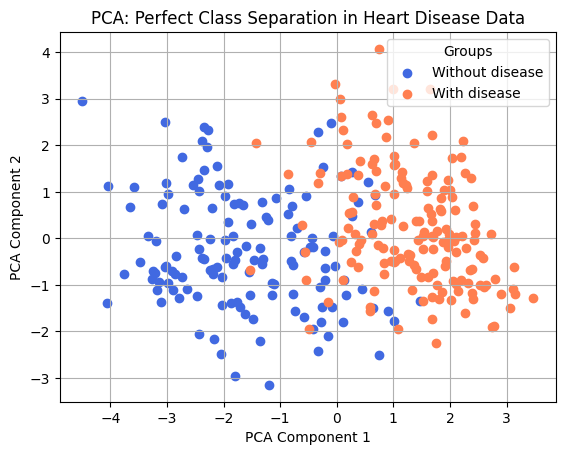

In [48]:
plt.scatter(hearts_transformed[target == 0, 0], hearts_transformed[target == 0, 1], color='royalblue', label='Without disease')
plt.scatter(hearts_transformed[target == 1, 0], hearts_transformed[target == 1, 1], color='coral', label='Without disease')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA: Perfect Class Separation in Heart Disease Data')
plt.legend(['Without disease', 'With disease'], title="Groups", loc="upper right")
plt.grid()
plt.show()

<h2> 1. KMeans </h2>

In [49]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(hearts_transformed)
labels = kmeans.labels_

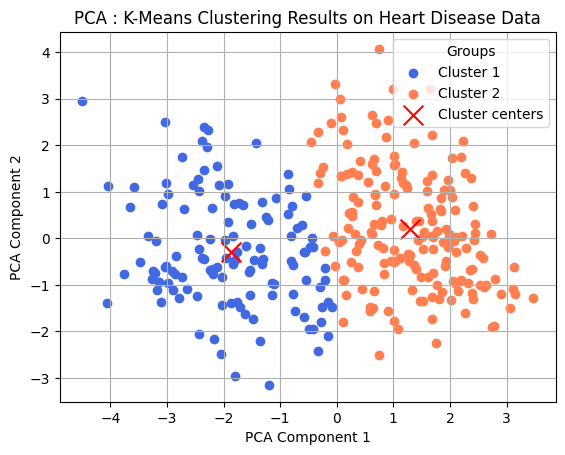

In [50]:
plt.scatter(hearts_transformed[labels==0, 0], hearts_transformed[labels==0, 1], color='royalblue', label='Cluster 1')
plt.scatter(hearts_transformed[labels==1, 0], hearts_transformed[labels==1, 1], color='coral', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', s=200, c='red', label='Cluster centers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Groups", loc="upper right")
plt.title('PCA : K-Means Clustering Results on Heart Disease Data')
plt.grid()
plt.show()

In [19]:
kmeans_silhouette = silhouette_score(hearts_transformed, labels)
kmeans_calinski_harabasz = calinski_harabasz_score(hearts_transformed, labels)
kmeans_davies_bouldin = davies_bouldin_score(hearts_transformed, labels)


<h3> Model quality assessment KMeans </h3>

In [21]:
print(f'Kmeans Silhouette score : {kmeans_silhouette}')
print(f'Kmeans Calinski-Harabasz score : {kmeans_calinski_harabasz}')
print(f'Kmeans Davies-Bouldin score : {kmeans_davies_bouldin}')

Kmeans Silhouette score : 0.4500011895232737
Kmeans Calinski-Harabasz score : 310.7327075539107
Kmeans Davies-Bouldin score : 0.8663816093269215


<h2> 2. Mean Shift </h2>

In [51]:
bandwidth = estimate_bandwidth(hearts_transformed, quantile=0.25, n_samples=size)

In [52]:
ms = MeanShift(bandwidth=bandwidth)
ms.fit(hearts_transformed)
labels = ms.labels_

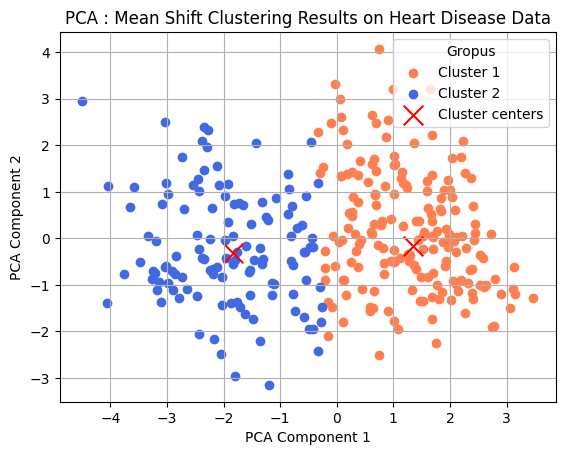

In [54]:
plt.scatter(hearts_transformed[labels==0, 0], hearts_transformed[labels==0, 1], color='coral', label='Cluster 1')
plt.scatter(hearts_transformed[labels==1, 0], hearts_transformed[labels==1, 1], color='royalblue', label='Cluster 2')
plt.scatter(ms.cluster_centers_[:,0], ms.cluster_centers_[:,1], marker='x', s=200, c='red', label='Cluster centers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Gropus", loc="upper right")
plt.title('PCA : Mean Shift Clustering Results on Heart Disease Data')
plt.grid()
plt.show()

In [25]:
meanshift_silhouette = silhouette_score(hearts_transformed, labels)
meanshift_calinski_harabasz = calinski_harabasz_score(hearts_transformed, labels)
meanshift_davies_bouldin = davies_bouldin_score(hearts_transformed, labels)

<h3> Model quality assessment Mean Shift </h3>

In [26]:
print(f'Mean Shift Silhouette score : {meanshift_silhouette}')
print(f'Mean Shift Calinski-Harabasz score : {meanshift_calinski_harabasz}')
print(f'Mean Shift Davies-Bouldin score : {meanshift_davies_bouldin}')

Mean Shift Silhouette score : 0.4480571831339297
Mean Shift Calinski-Harabasz score : 308.628752732322
Mean Shift Davies-Bouldin score : 0.8652665204265042


<h2> 3. GMM </h2>

In [55]:
gmm = GaussianMixture(n_components=2, random_state=2025)
gmm.fit(hearts_transformed)
labels = gmm.predict(hearts_transformed)

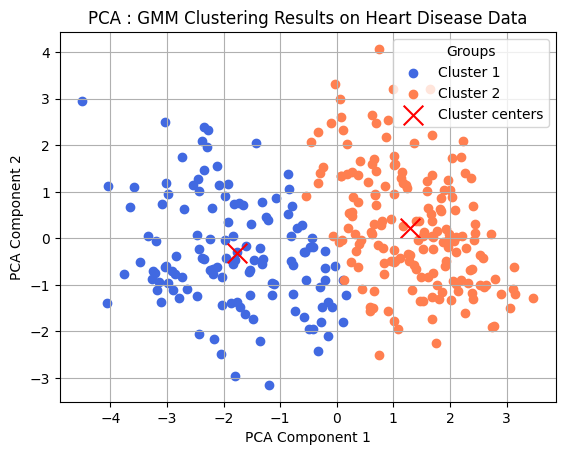

In [56]:
plt.scatter(hearts_transformed[labels==0, 0], hearts_transformed[labels==0, 1], color='royalblue', label='Cluster 1')
plt.scatter(hearts_transformed[labels==1, 0], hearts_transformed[labels==1, 1], color='coral', label='Cluster 2')
plt.scatter(gmm.means_[:,0], gmm.means_[:,1], marker='x', s=200, c='red', label='Cluster centers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Groups", loc="upper right")
plt.title('PCA : GMM Clustering Results on Heart Disease Data')
plt.grid()
plt.show()

In [31]:
gmm_silhouette = silhouette_score(hearts_transformed, labels)
gmm_harabasz = calinski_harabasz_score(hearts_transformed, labels)
gmm_davies_bouldin = davies_bouldin_score(hearts_transformed, labels)

<h3> Model quality assessment GMM </h3>

In [32]:
print(f'GMM Silhouette score : {gmm_silhouette}')
print(f'GMM Calinski-Harabasz score : {gmm_harabasz}')
print(f'GMM Davies-Bouldin score : {gmm_davies_bouldin}')

GMM Silhouette score : 0.44582135077189283
GMM Calinski-Harabasz score : 306.4030956330483
GMM Davies-Bouldin score : 0.8769171346608233


<h2>4. K-Nearest Neighbors </h2>

In [57]:
knn = KNeighborsClassifier(n_neighbors=(size//2))
knn.fit(hearts_transformed, hearts.target)
labels = knn.predict(hearts_transformed)

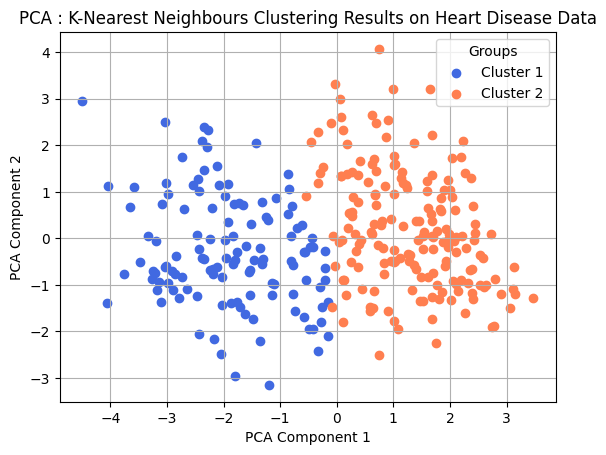

In [58]:
plt.scatter(hearts_transformed[labels==0, 0], hearts_transformed[labels==0, 1], color='royalblue', label='Cluster 1')
plt.scatter(hearts_transformed[labels==1, 0], hearts_transformed[labels==1, 1], color='coral', label='Cluster 2')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Groups", loc="upper right")
plt.title('PCA : K-Nearest Neighbours Clustering Results on Heart Disease Data')
plt.grid()
plt.show()

In [37]:
knn_silhouette = silhouette_score(hearts_transformed, labels)
knn_harabasz = calinski_harabasz_score(hearts_transformed, labels)
knn_davies_bouldin = davies_bouldin_score(hearts_transformed, labels)

<h3> Model quality assessment K-Nearest Neighbors </h3>

In [38]:
print(f'KNN Silhouette score : {knn_silhouette}')
print(f'KNN Calinski-Harabasz score : {knn_harabasz}')
print(f'KNN Davies-Bouldin score : {knn_davies_bouldin}')

KNN Silhouette score : 0.44582135077189283
KNN Calinski-Harabasz score : 306.4030956330483
KNN Davies-Bouldin score : 0.8769171346608233


<h1> Conclusions from Clustering and Classification Analysis </h1>

Based on the presented results, it can be concluded that KMeans is the best clustering model in this analysis. It achieved the highest Silhouette Score (0.450), which indicates the best cluster separation, and the highest Calinski-Harabasz Score (310.7), meaning the clusters are well compacted internally and clearly separated from each other. Additionally, KMeans obtained the lowest Davies-Bouldin Score (0.864), suggesting less overlap between clusters and better internal cohesion compared to Mean Shift. As a result, KMeans provides more distinct and stable data grouping, making it the best choice in this analysis.
